In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [5]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

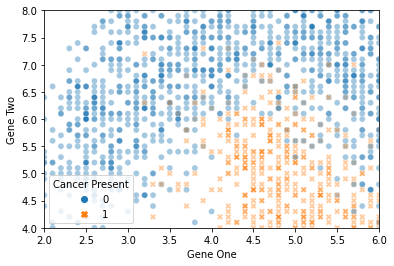

In [12]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', style='Cancer Present',hue='Cancer Present',alpha=0.4)
plt.xlim(2,6)
plt.ylim(4,8)

In [9]:
len(df)

3000

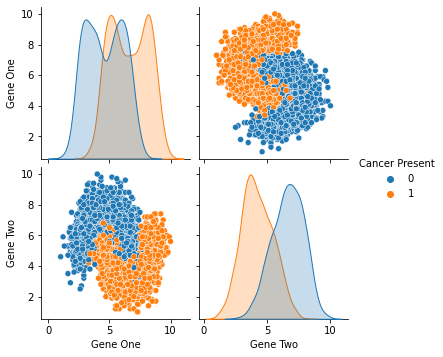

In [14]:
sns.pairplot(df, hue='Cancer Present')

# Model Training and Scaling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']



In [18]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3)

In [19]:
scaler=StandardScaler()

In [20]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# help(KNeighborsClassifier)

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

prediction

In [31]:
y_pred=knn_model.predict(scaled_X_test)

# model evaluation

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[414,  35],
       [ 56, 395]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       449
           1       0.92      0.88      0.90       451

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [35]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

using pipeline and also elbow and c  method for choosing appropriate value of K

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
1-accuracy_score(y_test,y_pred)

0.10111111111111115

# Elbow method for choosing K value

In [41]:
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test=knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [42]:
test_error_rates

[0.10111111111111115,
 0.10333333333333339,
 0.0822222222222222,
 0.0755555555555556,
 0.07666666666666666,
 0.07333333333333336,
 0.07111111111111112,
 0.07222222222222219,
 0.07333333333333336,
 0.07666666666666666,
 0.06888888888888889,
 0.07333333333333336,
 0.06999999999999995,
 0.07222222222222219,
 0.06777777777777783,
 0.07111111111111112,
 0.06666666666666665,
 0.06888888888888889,
 0.06777777777777783,
 0.06666666666666665,
 0.06333333333333335,
 0.06555555555555559,
 0.06444444444444442,
 0.06444444444444442,
 0.06444444444444442,
 0.06555555555555559,
 0.06444444444444442,
 0.06666666666666665,
 0.06555555555555559]

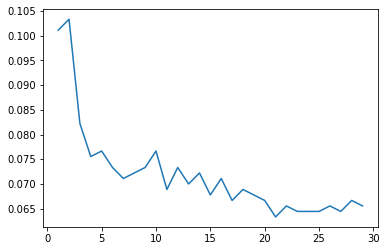

In [43]:
plt.plot(range(1,30), test_error_rates)

Cross Validation Grid Search for K Value and forming the final model

In [44]:
#pipeline-->gridearch  CV

scaler=StandardScaler()


In [45]:
knn=KNeighborsClassifier()

In [46]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [47]:
operations=[('scaler', scaler),('knn',knn)]

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipe=Pipeline(operations)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
k_values=list(range(1,20))

In [53]:
param_grid = {'knn__n_neighbors':k_values}

In [54]:
full_cv_slassifier = GridSearchCV(pipe,param_grid,cv=5, 
                                  scoring='accuracy')

In [55]:
full_cv_slassifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [57]:
full_cv_slassifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [59]:
full_pred=full_cv_slassifier.predict(X_test)

In [60]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       449
           1       0.93      0.91      0.92       451

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [61]:
new_patient=[[3.8,6.4]]

In [62]:
full_cv_slassifier.predict(new_patient)

array([0], dtype=int64)

In [63]:
full_cv_slassifier.predict_proba(new_patient)

array([[0.8, 0.2]])